# Persoalan
Unduhlah salah satu data di situs SEKI https://www.bi.go.id/id/statistik/ekonomi-
keuangan/seki/default.aspx , Lakukan  prediktif analitik, time series forecasting untuk 
menganalisis ada tidaknya tren, siklus atau seasonal. Berikan penjelasan hasil perhitungan 
dan carilah perhitungan performanya.

## Packages

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA, sarimax

## Input Data

In [133]:
df = pd.read_excel('../dataset/TABEL7_1_revisi.xlsx', sheet_name='Sheet3')

In [134]:
df['Quarter'] = pd.to_datetime(df['Quarter'], format='%B %Y')
df.set_index('Quarter', inplace=True)


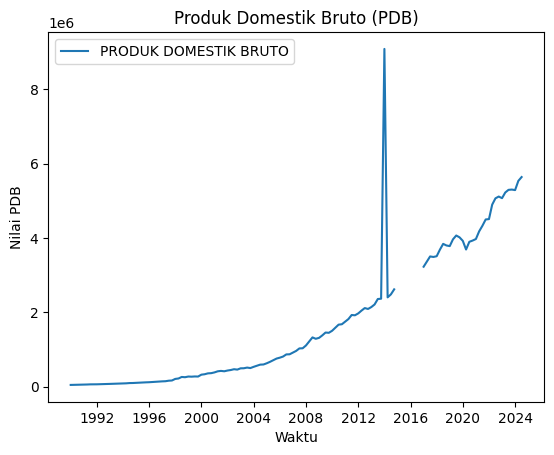

In [135]:
plt.plot(df.index, df['PRODUK DOMESTIK BRUTO'], label='PRODUK DOMESTIK BRUTO')
plt.title('Produk Domestik Bruto (PDB)')
plt.xlabel('Waktu')
plt.ylabel('Nilai PDB')
plt.legend()
plt.show()

## Cleaning Data

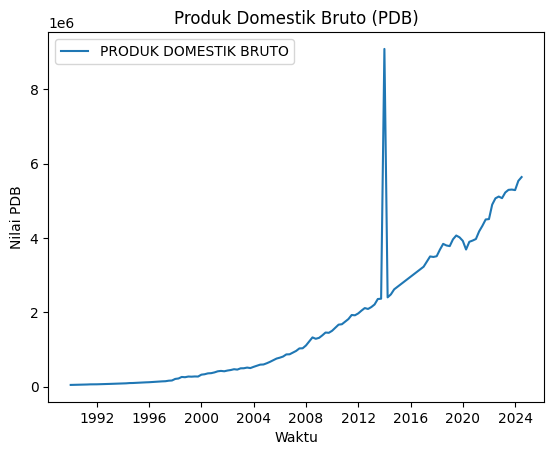

In [140]:
df['PRODUK DOMESTIK BRUTO'] = df['PRODUK DOMESTIK BRUTO'].interpolate(method='linear')
plt.plot(df.index, df['PRODUK DOMESTIK BRUTO'], label='PRODUK DOMESTIK BRUTO')
plt.title('Produk Domestik Bruto (PDB)')
plt.xlabel('Waktu')
plt.ylabel('Nilai PDB')
plt.legend()
plt.show()

In [141]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['PRODUK DOMESTIK BRUTO'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] > 0.05:
    print("Data tidak stasioner. Differencing diperlukan.")
else:
    print("Data sudah stasioner.")


ADF Statistic: 1.1591752135224198
p-value: 0.9956913214458238
Data tidak stasioner. Differencing diperlukan.


In [142]:
df['PDB_DIFF'] = df['PRODUK DOMESTIK BRUTO'].diff().dropna()

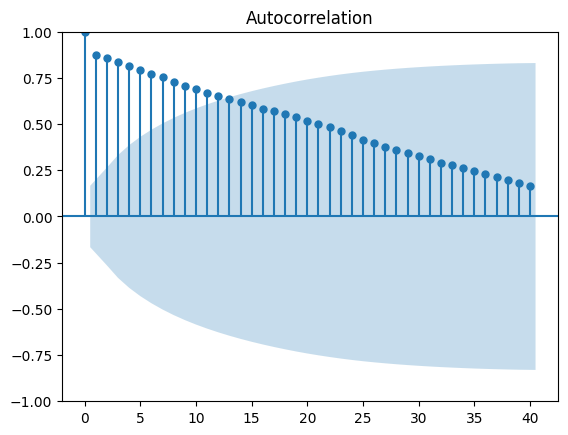

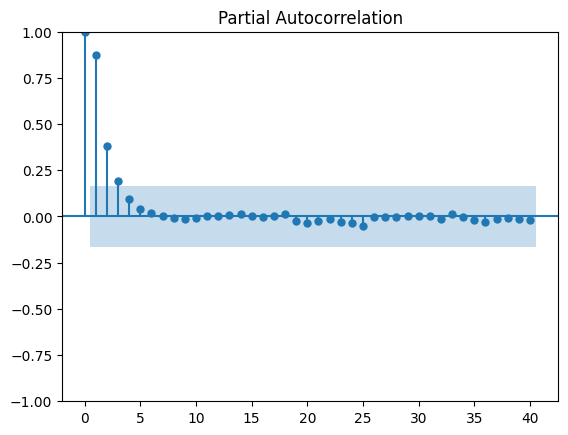

In [143]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['PRODUK DOMESTIK BRUTO'].dropna(), lags=40)
plot_pacf(df['PRODUK DOMESTIK BRUTO'].dropna(), lags=40)
plt.show()

In [ ]:
# model = ARIMA(df['PRODUK DOMESTIK BRUTO'], order=(1, 1, 1))
# model_fit = model.fit()
# df['PRODUK DOMESTIK BRUTO'] = df['PRODUK DOMESTIK BRUTO'].fillna(model_fit.predict())

# # df['PRODUK DOMESTIK BRUTO'] = df['PRODUK DOMESTIK BRUTO'].interpolate(method='linear') 

/home/budi-setiawan/Repositories/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/budi-setiawan/Repositories/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/budi-setiawan/Repositories/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


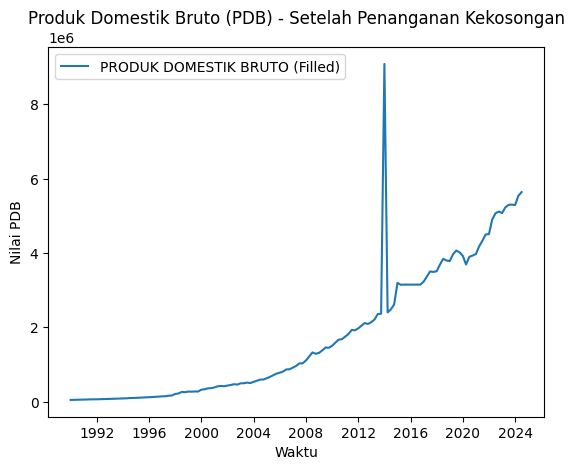

In [125]:
# plt.plot(df.index, df['PRODUK DOMESTIK BRUTO'], label='PRODUK DOMESTIK BRUTO (Filled)')
# plt.title('Produk Domestik Bruto (PDB) - Setelah Penanganan Kekosongan')
# plt.xlabel('Waktu')
# plt.ylabel('Nilai PDB')
# plt.legend()
# plt.show()

In [144]:
print(df['PRODUK DOMESTIK BRUTO'].isnull().sum())  # Jumlah NaN
print(df['PRODUK DOMESTIK BRUTO'].describe())

0
count    1.390000e+02
mean     1.724496e+06
std      1.781263e+06
min      4.995840e+04
25%      2.606848e+05
50%      9.638625e+05
75%      2.991610e+06
max      9.083972e+06
Name: PRODUK DOMESTIK BRUTO, dtype: float64


In [145]:
# from statsmodels.tsa.stattools import adfuller

# result = adfuller(df['PRODUK DOMESTIK BRUTO'])
# print("ADF Statistic:", result[0])
# print("p-value:", result[1])

# if result[1] > 0.05:
#     print("Data tidak stasioner. Lakukan differencing.")

ADF Statistic: 1.1591752135224198
p-value: 0.9956913214458238
Data tidak stasioner. Lakukan differencing.


In [128]:
# # df['PRODUK DOMESTIK BRUTO_DIFF'] = df['PRODUK DOMESTIK BRUTO'].diff().dropna()
# df['PRODUK DOMESTIK BRUTO_DIFF'] = df['PRODUK DOMESTIK BRUTO'].diff().dropna()

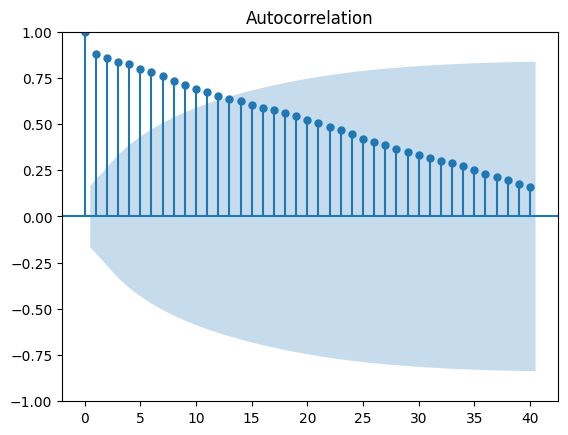

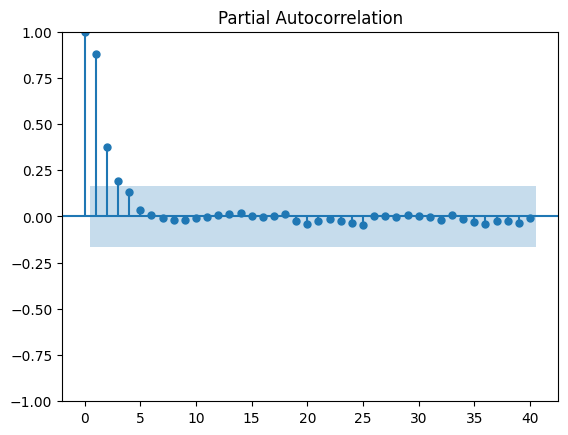

## Prediction

/home/budi-setiawan/Repositories/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/budi-setiawan/Repositories/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/home/budi-setiawan/Repositories/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/tmp/ipykernel_184552/3709281829.py:25: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=3), periods=forecast_steps, freq='Q')


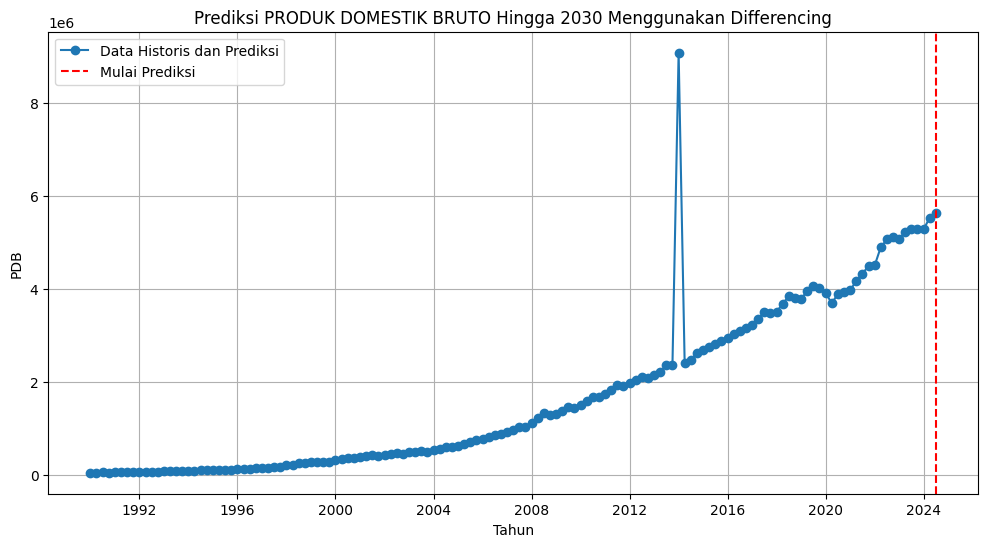

            PRODUK DOMESTIK BRUTO
2024-12-31                    NaN
2025-03-31                    NaN
2025-06-30                    NaN
2025-09-30                    NaN
2025-12-31                    NaN
2026-03-31                    NaN
2026-06-30                    NaN
2026-09-30                    NaN
2026-12-31                    NaN
2027-03-31                    NaN
2027-06-30                    NaN
2027-09-30                    NaN
2027-12-31                    NaN
2028-03-31                    NaN
2028-06-30                    NaN
2028-09-30                    NaN
2028-12-31                    NaN
2029-03-31                    NaN
2029-06-30                    NaN
2029-09-30                    NaN
2029-12-31                    NaN
2030-03-31                    NaN
2030-06-30                    NaN
2030-09-30                    NaN


In [146]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Pastikan data bersih dan interpolasi nilai kosong
df['PRODUK DOMESTIK BRUTO'] = df['PRODUK DOMESTIK BRUTO'].interpolate(method='linear')

# Lakukan differencing untuk membuat data stasioner
df['PDB_DIFF'] = df['PRODUK DOMESTIK BRUTO'].diff().dropna()

# Buat model ARIMA menggunakan data differenced
model = ARIMA(df['PDB_DIFF'].dropna(), order=(1, 0, 1))  # d=0 karena sudah differenced
model_fit = model.fit()

# Prediksi 24 kuartal (hingga 2030)
forecast_steps = (2030 - 2024) * 4
forecast_diff = model_fit.forecast(steps=forecast_steps)

# Kembalikan hasil prediksi ke skala asli
forecast_cumsum = forecast_diff.cumsum()  # Cumulative sum untuk membalik differencing
last_actual_value = df['PRODUK DOMESTIK BRUTO'].iloc[-1]
forecast_original_scale = last_actual_value + forecast_cumsum

# Membuat DataFrame prediksi
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=3), periods=forecast_steps, freq='Q')
forecast_df = pd.DataFrame({'PRODUK DOMESTIK BRUTO': forecast_original_scale}, index=future_dates)

# Gabungkan data historis dan prediksi
result = pd.concat([df[['PRODUK DOMESTIK BRUTO']], forecast_df])

# Visualisasi
plt.figure(figsize=(12, 6))
plt.plot(result.index, result['PRODUK DOMESTIK BRUTO'], label='Data Historis dan Prediksi', marker='o')
plt.axvline(x=df.index[-1], color='red', linestyle='--', label='Mulai Prediksi')
plt.title('Prediksi PRODUK DOMESTIK BRUTO Hingga 2030 Menggunakan Differencing')
plt.xlabel('Tahun')
plt.ylabel('PDB')
plt.legend()
plt.grid()
plt.show()

# Menampilkan hasil prediksi
print(forecast_df)


In [131]:
print(model_fit.summary())

                                 SARIMAX Results                                 
Dep. Variable:     PRODUK DOMESTIK BRUTO   No. Observations:                  139
Model:                    ARIMA(1, 1, 1)   Log Likelihood               -2040.059
Date:                   Fri, 13 Dec 2024   AIC                           4086.117
Time:                           07:09:02   BIC                           4094.899
Sample:                       01-01-1990   HQIC                          4089.686
                            - 07-01-2024                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0916      0.061     -1.505      0.132      -0.211       0.028
ma.L1         -0.6983      0.047    -14.831      0.000      -0.791      -0.606
sigma2      4.283e+11    1.5

In [132]:
result

,PRODUK DOMESTIK BRUTO,PRODUK DOMESTIK BRUTO_DIFF
1990-01-01,49958.4,NaN
1990-04-01,51681.6,1723.2
1990-07-01,54864.6,3183.0
1990-10-01,54361.6,-503.0
1991-01-01,58937.2,4575.6
...,...,...
2029-09-30,NaN,NaN
2029-12-31,NaN,NaN
2030-03-31,NaN,NaN
2030-06-30,NaN,NaN
